In [1]:
from fastai.vision import *
import numpy as np

In [7]:
folder = 'Women'
file = 'women.csv'

In [8]:
classes = ['men', 'women']

In [9]:
path = Path('data')
dest = path/folder
download_images(path/file,dest, max_pics=150)

In [10]:
np.random.seed(42)

In [12]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                     ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['Men', 'Women']

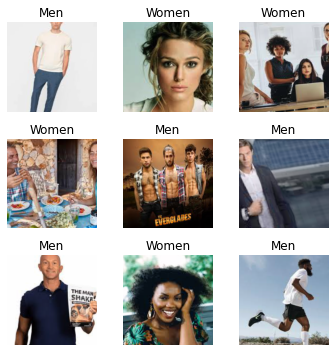

In [15]:
data.show_batch(rows=3, figsize=(5,5))

In [16]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.055478,2.258380,0.566038,00:30
1,0.851473,0.468099,0.188679,00:32
2,0.647865,0.379526,0.094340,00:31
3,0.533959,0.400176,0.075472,00:31


In [18]:
learn.save('stage-1')

In [19]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


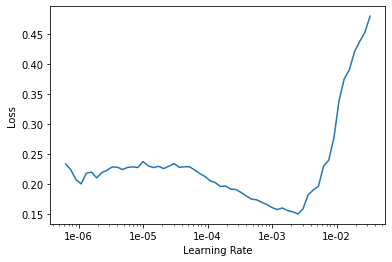

In [21]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.376367,0.746765,0.207547,00:48
1,0.477560,2.935501,0.207547,00:47
2,0.425977,2.840507,0.169811,00:44
3,0.376608,1.854100,0.188679,00:43


In [24]:
learn.save('stage-2')

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

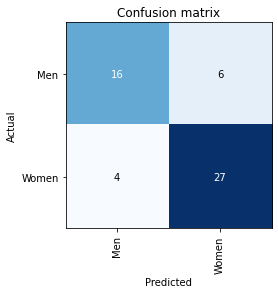

In [26]:
interp.plot_confusion_matrix()

In [27]:
from fastai.widgets import *

In [28]:
db = (ImageList.from_folder(path)
      .split_none()
     .label_from_folder()
     .transform(get_transforms(),size=224)
     .databunch())

In [29]:
learn_cln = cnn_learner(db, models.resnet18, metrics=error_rate)


In [30]:
learn_cln.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (265 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Women,Women,Women,Women,Women
Path: data;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

In [31]:
ds, idx = DatasetFormatter().from_toplosses(learn_cln)

In [32]:
ImageCleaner(ds,idx,path)

'No images to show :)'

In [33]:
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
                               ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
new_learner = cnn_learner(data, models.resnet18, metrics=error_rate)

In [35]:
new_learner.fit_one_cycle(4, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.223622,1.198655,0.142857,00:32
1,0.196255,1.237918,0.102041,00:30
2,0.182647,1.194940,0.102041,00:30
3,0.171985,1.132144,0.081633,00:30


In [36]:
new_learner.save('stage-3')

In [37]:
new_learner.export()

In [39]:
defaults.device = torch.device('cpu')


In [40]:
img = open_image(path/'test.jpg')

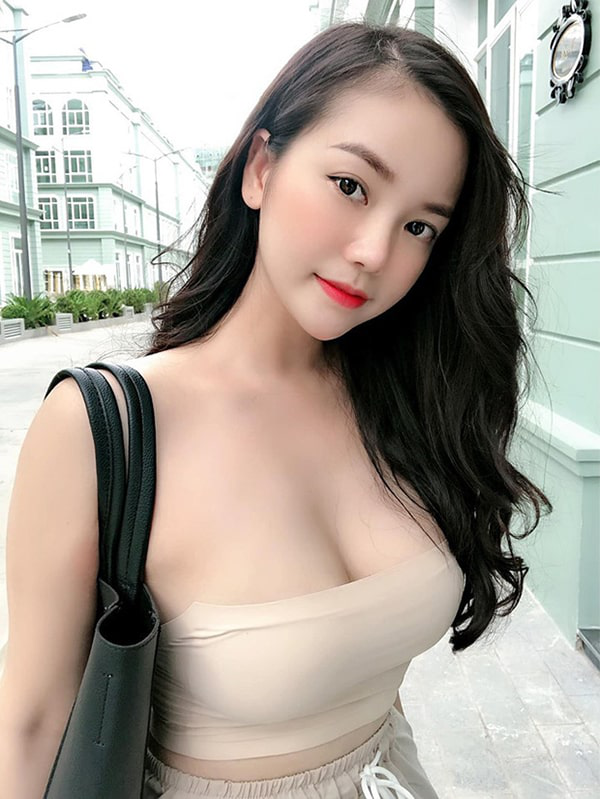

In [41]:
img